## 데이터 불러오기

In [1]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\jcy12\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\jcy12\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\jcy12\Anaconda3\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\jcy12\Anaconda3\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\jcy12\Anaconda3\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: 지정된 모듈을 찾을 수 없습니다.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Use

TypeError: can only concatenate str (not "list") to str

## 모델 구성하기 - Conv1D

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

model = Sequential()
# 이 층은 모델의 제일 첫 번째 층으로만 사용할 수 있습니다.
# Flatten 층을 사용하기 위해 input_length를 전달합니다.
model.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_len))
model.add(Conv1D(32, 7, activation = 'relu'))
model.add(MaxPooling1D(7))
model.add(Conv1D(32, 5, activation = 'relu'))
model.add(MaxPooling1D(5))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

## 모델 학습시키기

In [5]:
history = model.fit(pad_X_train, y_train, 
                    batch_size = 32, epochs = 30, 
                    validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 12s 625us/sample - loss: 0.4685 - acc: 0.7483 - val_loss: 0.3311 - val_acc: 0.8594
Epoch 2/30
20000/20000 [==============================] - 8s 396us/sample - loss: 0.2350 - acc: 0.9072 - val_loss: 0.3163 - val_acc: 0.8708
Epoch 3/30
20000/20000 [==============================] - 7s 373us/sample - loss: 0.1325 - acc: 0.9549 - val_loss: 0.3859 - val_acc: 0.8612
Epoch 4/30
20000/20000 [==============================] - 8s 392us/sample - loss: 0.0623 - acc: 0.9811 - val_loss: 0.4761 - val_acc: 0.8630
Epoch 5/30
20000/20000 [==============================] - 8s 383us/sample - loss: 0.0216 - acc: 0.9952 - val_loss: 0.6084 - val_acc: 0.8624
Epoch 6/30
20000/20000 [==============================] - 7s 358us/sample - loss: 0.0066 - acc: 0.9992 - val_loss: 0.7095 - val_acc: 0.8634
Epoch 7/30
20000/20000 [==============================] - 7s 357us/sample - loss: 0.0029 - acc: 0.9997 - val_l

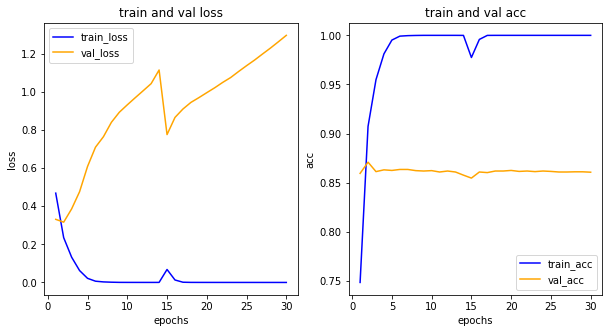

In [7]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

## 모델 구성하기 - Conv1D + LSTM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.sin(2 * np.pi * 0.05 + np.arange(0, 500)) + np.random.random(500)
plt.figure(figsize = (10, 5)) 
plt.plot(np.arange(0, 367), data[:367], 'bo-', color = 'blue', alpha = 0.2) # 학습용 데이터
plt.plot(np.arange(367, 500), data[367:], 'ro-', color = 'orange') # 테스트용 데이터

def data_gen(data, n):
    x_train = []
    y_train = []
    
    for i in range(len(data)):
        x = data[i:(i + n)]
        if (i + n) < len(data):
            x_train.append(x)
            y_train.append(data[i + n])
        else:
            break
            
    return np.array(x_train), np.array(y_train)

n = 10

x_train, y_train = data_gen(data, n)
x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.25)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Conv1D(32, 3, activation = 'relu', input_shape = (10, 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 3, activation = 'relu'))
# LSTM을 혼합하여 모델을 구성합니다.
model.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1))

model.compile(optimizer='adam',
             loss = 'mse',
             metrics = ['mse'])

# 학습을 진행합니다.
model.fit(x_train, y_train, epochs = 100, batch_size = 12)

pred = model.predict(x_test)

# 결과값을 그립니다.
train_axis = np.arange(0, len(y_train))
pred_axis = np.arange(len(y_train), len(y_train) + len(pred))
train_shape= y_train.shape[0]
test_shape = y_test.shape[0]
pred_shape = pred.shape[0]

plt.figure(figsize=(20,5))
plt.plot(train_axis, y_train.reshape(train_shape,), 'o-')
plt.plot(pred_axis, pred.reshape(pred_shape,), 'o-', color='orange', label='pred')
plt.plot(pred_axis, y_test.reshape(test_shape,), 'o-', color='blue', alpha=0.2, label='ground-truth')
plt.legend()
plt.show()